In [ ]:
Problem Statement:

A credit card is one of the most used financial products to make online purchases and payments. Though the Credit cards can be a convenient way to manage your finances, they can also be risky. Credit card fraud is the unauthorized use of someone else's credit card or credit card information to make purchases or withdraw cash.

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

The dataset contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

We have to build a classification model to predict whether a transaction is fraudulent or not.



Steps:-
    
The steps are broadly divided into below steps. The sub steps are also listed while we approach each of the steps.

Reading, understanding and visualising the data
Preparing the data for modelling
Building the model
Evaluate the model



In [ ]:
# Importing the libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
pd.set_option('display.max_columns', 500)

In [ ]:
Exploratory data analysis
Reading and understanding the data

In [9]:
# Import pandas
import pandas as pd

# Reading the dataset
df = pd.read_csv('C:/Users/Roopa Prabhu/OneDrive/Documents/creditcard fraud data 1.csv')
print(df.head())  # Display the first few rows of the dataset

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [10]:
df.shape

(284807, 31)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [12]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.759061e-12,-8.251130e-13,-9.654937e-13,8.321385e-13,1.649999e-13,4.248366e-13,-3.054600e-13,8.777971e-14,-1.179749e-12,...,-3.405756e-13,-5.723197e-13,-9.725856e-13,1.464150e-12,-6.987102e-13,-5.617874e-13,3.332082e-12,-3.518874e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
Handling missing values
Handling missing values in columns


In [13]:
# Cheking percent of missing values in columns
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
Time,0.0
V16,0.0
Amount,0.0
V28,0.0
V27,0.0
V26,0.0
V25,0.0
V24,0.0
V23,0.0
V22,0.0


In [ ]:
We can see that there is no missing values in any of the columns. Hence, there is no problem with null values in the entire dataset.

In [ ]:
Checking the distribution of the classes

In [14]:
classes = df['Class'].value_counts()
classes

Class
0    284315
1       492
Name: count, dtype: int64

In [15]:
normal_share = round((classes[0]/df['Class'].count()*100),2)
normal_share

99.83

In [16]:
fraud_share = round((classes[1]/df['Class'].count()*100),2)
fraud_share

0.17

In [ ]:
We can see that there is only 0.17% frauds. We will take care of the class imbalance later.

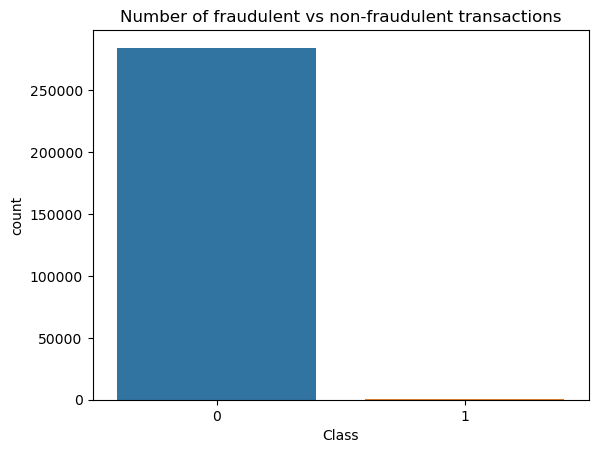

In [23]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is already loaded
sns.countplot(x='Class', data=df)
plt.title('Number of fraudulent vs non-fraudulent transactions')
plt.show()


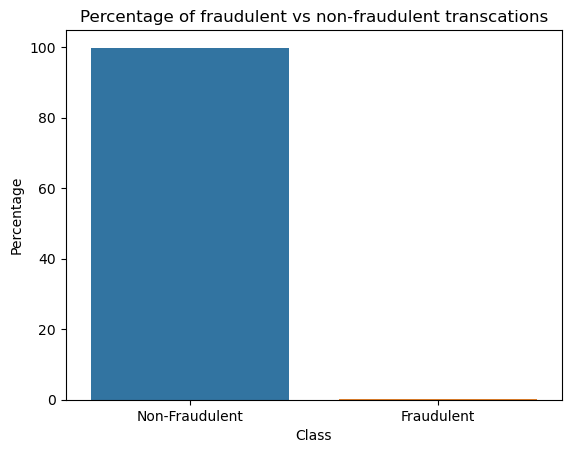

In [24]:
# Bar plot for the percentage of fraudulent vs non-fraudulent transcations
fraud_percentage = {'Class':['Non-Fraudulent', 'Fraudulent'], 'Percentage':[normal_share, fraud_share]} 
df_fraud_percentage = pd.DataFrame(fraud_percentage) 
sns.barplot(x='Class',y='Percentage', data=df_fraud_percentage)
plt.title('Percentage of fraudulent vs non-fraudulent transcations')
plt.show()

In [ ]:
Outliers treatment

We are not performing any outliers treatment for this particular dataset. Because all the columns are already PCA transformed, which assumed that the outlier values are taken care while transforming the data.

In [ ]:
Observe the distribution of classes with time

In [25]:
# Creating fraudulent dataframe
data_fraud = df[df['Class'] == 1]
# Creating non fraudulent dataframe
data_non_fraud = df[df['Class'] == 0]

C:\Users\Roopa Prabhu\AppData\Local\Temp\ipykernel_44720\1819823595.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data_fraud['Time'],label='fraudulent',hist=False)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Roopa Prabhu\AppData\Local\Temp\ipykernel_44720\1819823595.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use ei

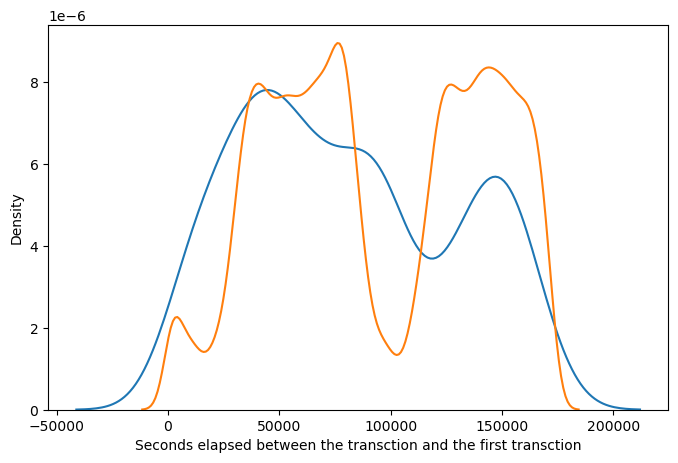

In [26]:
# Distribution plot
plt.figure(figsize=(8,5))
ax = sns.distplot(data_fraud['Time'],label='fraudulent',hist=False)
ax = sns.distplot(data_non_fraud['Time'],label='non fraudulent',hist=False)
ax.set(xlabel='Seconds elapsed between the transction and the first transction')
plt.show()

In [ ]:
Analysis
We do not see any specific pattern for the fraudulent and non-fraudulent transctions with respect to Time. Hence, we can drop the Time column.



In [27]:
# Dropping the Time column
df.drop('Time', axis=1, inplace=True)

In [28]:
# Import library
from sklearn.model_selection import train_test_split

In [29]:
# Putting feature variables into X
X = df.drop(['Class'], axis=1)

In [30]:
# Putting target variable to y
y = df['Class']

In [31]:
# Splitting data into train and test set 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

In [ ]:
Feature Scaling
We need to scale only the Amount column as all other columns are already scaled by the PCA transformation.

In [32]:
# Standardization method
from sklearn.preprocessing import StandardScaler

In [33]:
# Instantiate the Scaler
scaler = StandardScaler()

In [34]:
# Fit the data into scaler and transform
X_train['Amount'] = scaler.fit_transform(X_train[['Amount']])

In [35]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
201788,2.023734,-0.429219,-0.691061,-0.201461,-0.162486,0.283718,-0.674694,0.192230,1.124319,-0.037763,...,-0.171390,-0.195207,-0.477813,0.340513,0.059174,-0.431015,-0.297028,-0.000063,-0.046947,-0.345273
179369,-0.145286,0.736735,0.543226,0.892662,0.350846,0.089253,0.626708,-0.049137,-0.732566,0.297692,...,0.206709,-0.124288,-0.263560,-0.110568,-0.434224,-0.509076,0.719784,-0.006357,0.146053,-0.206439
73138,-3.015846,-1.920606,1.229574,0.721577,1.089918,-0.195727,-0.462586,0.919341,-0.612193,-0.966197,...,0.842838,0.274911,-0.319550,0.212891,-0.268792,0.241190,0.318445,-0.100726,-0.365257,0.358043
208679,1.851980,-1.007445,-1.499762,-0.220770,-0.568376,-1.232633,0.248573,-0.539483,-0.813368,0.785431,...,-0.196551,-0.406722,-0.899081,0.137370,0.075894,-0.244027,0.455618,-0.094066,-0.031488,0.362400
206534,2.237844,-0.551513,-1.426515,-0.924369,-0.401734,-1.438232,-0.119942,-0.449263,-0.717258,0.851668,...,-0.045417,0.050447,0.125601,0.215531,-0.080485,-0.063975,-0.307176,-0.042838,-0.063872,-0.316109


In [36]:
# Transform the test set
X_test['Amount'] = scaler.transform(X_test[['Amount']])
X_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
49089,1.229452,-0.235478,-0.627166,0.419877,1.797014,4.069574,-0.896223,1.036103,0.745991,-0.147304,...,-0.057922,-0.170060,-0.288750,-0.130270,1.025935,0.847990,-0.271476,0.060052,0.018104,-0.340485
154704,2.016893,-0.088751,-2.989257,-0.142575,2.675427,3.332289,-0.652336,0.752811,1.962566,-1.025024,...,-0.147619,-0.184153,-0.089661,0.087188,0.570679,0.101899,0.620842,-0.048958,-0.042831,-0.320859
67247,0.535093,-1.469185,0.868279,0.385462,-1.439135,0.368118,-0.499370,0.303698,1.042073,-0.437209,...,0.437685,0.028010,-0.384708,-0.128376,0.286638,-0.136700,0.913904,-0.083364,0.052485,0.853442
251657,2.128486,-0.117215,-1.513910,0.166456,0.359070,-0.540072,0.116023,-0.216140,0.680314,0.079977,...,-0.227278,-0.357993,-0.905085,0.223474,-1.075605,-0.188519,0.267672,-0.071733,-0.072238,-0.344410
201903,0.558593,1.587908,-2.368767,5.124413,2.171788,-0.500419,1.059829,-0.254233,-1.959060,0.948915,...,0.249457,-0.035049,0.271455,0.381606,0.332001,-0.334757,0.448890,0.168585,0.004955,-0.229480


In [ ]:
Model building on imbalanced data

In [ ]:
XG boost

In [57]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.2/124.9 MB 2.4 MB/s eta 0:00:53
   ---------------------------------------- 0.9/124.9 MB 7.4 MB/s eta 0:00:17
    --------------------------------------- 1.8/124.9 MB 10.6 MB/s eta 0:00:12
    --------------------------------------- 2.9/124.9 MB 13.1 MB/s eta 0:00:10
   - -------------------------------------- 4.1/124.9 MB 16.5 MB/s eta 0:00:08
   - -------------------------------------- 4.4/124.9 MB 14.0 MB/s eta 0:00:09
   - -------------------------------------- 5.4/124.9 MB 15.6 MB/s eta 0:00:08
   - -------------------------------------- 6.1/124.9 MB 15.0 MB/s eta 0:00:08
   -- ------------------------------------- 6.6/124.9 MB 14.4 MB/s eta 0:00:09
   -- ------------------------------------- 7.0/124.9 MB 14.1 MB/s eta 

In [61]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Create parameter grid
param_grid = {
    'learning_rate': [0.2, 0.6], 
    'subsample': [0.3, 0.6, 0.9]
}

# Specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# Set up GridSearchCV
model_cv = GridSearchCV(estimator=xgb_model, 
                        param_grid=param_grid, 
                        scoring='roc_auc', 
                        cv=folds, 
                        verbose=1, 
                        return_train_score=True)

   

In [62]:
from imblearn.under_sampling import RandomUnderSampler

# Assuming X_train and y_train are your original training data
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

In [63]:
from imblearn.over_sampling import SMOTE

# Assuming X_train and y_train are your original training data
smote = SMOTE(random_state=42)
X_train_rus, y_train_rus = smote.fit_resample(X_train, y_train)

In [69]:
model_cv.fit(X_train_rus, y_train_rus)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=200,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [68]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,10.419694,0.107694,0.266861,0.022778,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.999676,0.999732,0.999702,0.999703,0.000023,4,0.999741,0.999716,0.999744,0.999734,1.266793e-05
1,10.478049,0.077041,0.272166,0.008903,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.999661,0.999745,0.999674,0.999693,0.000037,6,0.999729,0.999735,0.999716,0.999727,7.834022e-06
2,10.217941,0.147338,0.250910,0.012447,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.999664,0.999723,0.999710,0.999699,0.000025,5,0.999730,0.999717,0.999744,0.999730,1.092681e-05
3,10.506016,0.170476,0.262607,0.007213,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.999949,0.999952,0.999941,0.999947,0.000004,3,0.999971,0.999975,0.999973,0.999973,1.468335e-06
4,10.861032,0.146539,0.260757,0.007687,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.999955,0.999947,0.999954,0.999952,0.000003,1,0.999976,0.999980,0.999974,0.999977,2.505901e-06
5,11.446554,1.288235,0.257192,0.006741,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.999954,0.999952,0.999945,0.999950,0.000004,2,0.999975,0.999976,0.999976,0.999976,6.959910e-07


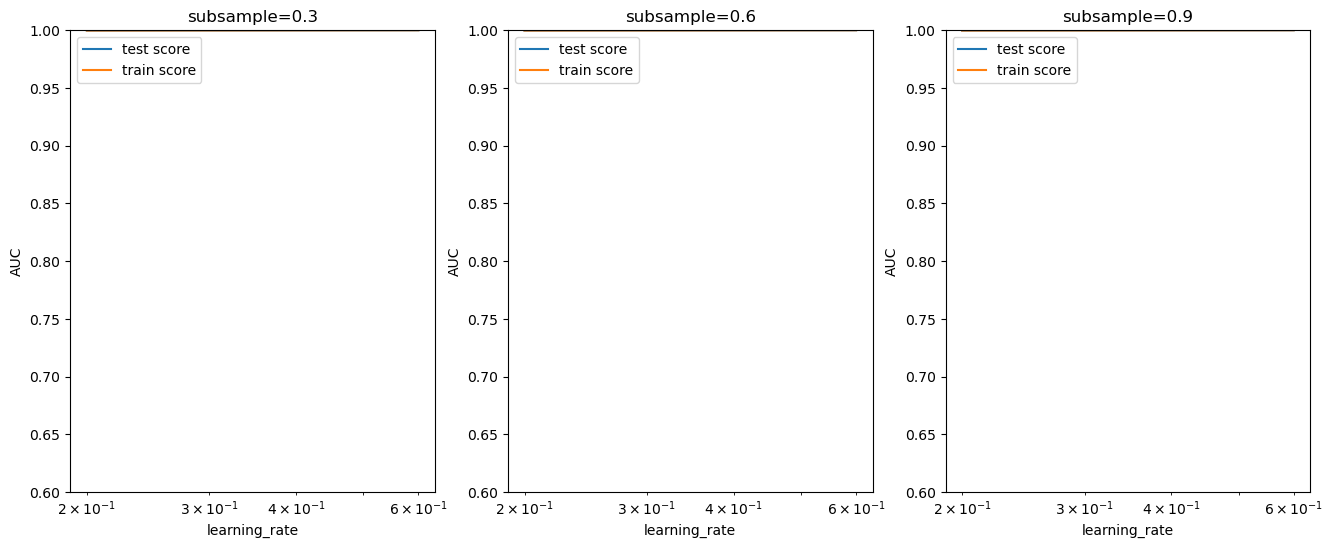

In [71]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

In [ ]:
Model with optimal hyperparameters
We see that the train score almost touches to 1. Among the hyperparameters, we can choose the best parameters as learning_rate : 0.2 and subsample: 0.3

In [72]:
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.6}

In [73]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': 0.2,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.6,
         'objective':'binary:logistic'}

# fit model on training data
xgb_bal_rus_model = XGBClassifier(params = params)
xgb_bal_rus_model.fit(X_train_rus, y_train_rus)

C:\Users\Roopa Prabhu\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [00:30:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "params" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None,
              params={'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.6}, ...)

In [ ]:
Prediction on the train set

In [75]:
# Predictions on the train set
y_train_pred = xgb_bal_rus_model.predict(X_train_rus)

In [77]:
from sklearn import metrics

# Predict using the trained model
y_pred_rus = model_cv.best_estimator_.predict(X_train_rus)

# Confusion matrix
confusion = metrics.confusion_matrix(y_train_rus, y_pred_rus)
print("Confusion Matrix:\n", confusion)

# Additional metrics
print("Accuracy:", metrics.accuracy_score(y_train_rus, y_pred_rus))
print("Precision:", metrics.precision_score(y_train_rus, y_pred_rus))
print("Recall:", metrics.recall_score(y_train_rus, y_pred_rus))
print("F1 Score:", metrics.f1_score(y_train_rus, y_pred_rus))

Confusion Matrix:
 [[227046    403]
 [    15 227434]]
Accuracy: 0.9990811126889985
Precision: 0.9982311915975017
Recall: 0.9999340511499281
F1 Score: 0.9990818957754026


In [78]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [79]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_rus, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9999978017049976
Sensitivity:- 0.9999340511499281
Specificity:- 0.9982281742280688


In [81]:
from sklearn.metrics import classification_report

# Assuming y_train_rus and y_train_pred are already defined
print(classification_report(y_train_rus, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       1.00      1.00      1.00    227449

    accuracy                           1.00    454898
   macro avg       1.00      1.00      1.00    454898
weighted avg       1.00      1.00      1.00    454898



In [82]:
# Predicted probability
y_train_pred_proba = xgb_bal_rus_model.predict_proba(X_train_rus)[:,1]

In [83]:
# roc_auc
auc = metrics.roc_auc_score(y_train_rus, y_train_pred_proba)
auc

1.0

In [85]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [86]:
# compute ROC AND AUC score

fpr, tpr, thresholds = roc_curve(y_train_rus, y_train_pred_proba)
roc_auc = auc(fpr, tpr)

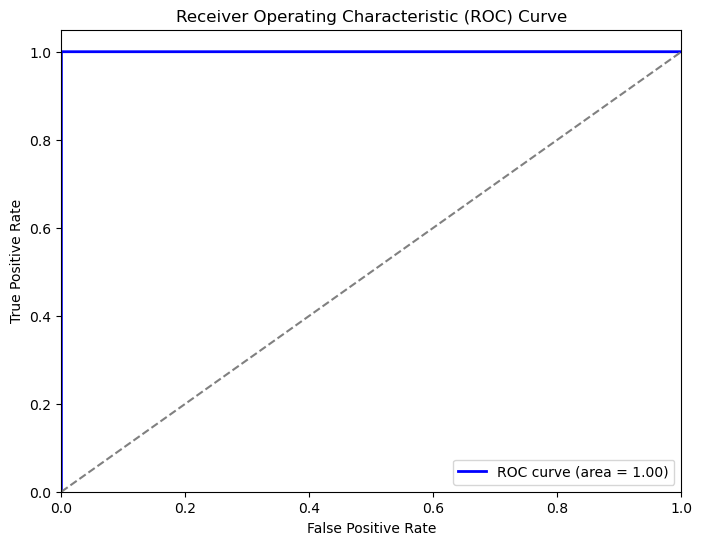

In [87]:
# Plot ROC curve

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
Prediction on the test set

In [88]:
# Predictions on the test set
y_test_pred = xgb_bal_rus_model.predict(X_test)

In [89]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[56830    36]
 [   19    77]]


In [90]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives


In [91]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9990344440153085
Sensitivity:- 0.8020833333333334
Specificity:- 0.9993669327893645


In [92]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.68      0.80      0.74        96

    accuracy                           1.00     56962
   macro avg       0.84      0.90      0.87     56962
weighted avg       1.00      1.00      1.00     56962



In [93]:
# Predicted probability
y_test_pred_proba = xgb_bal_rus_model.predict_proba(X_test)[:,1]

In [94]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc


0.9624112680101761

In [97]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [98]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_proba)
roc_auc = auc(fpr, tpr)

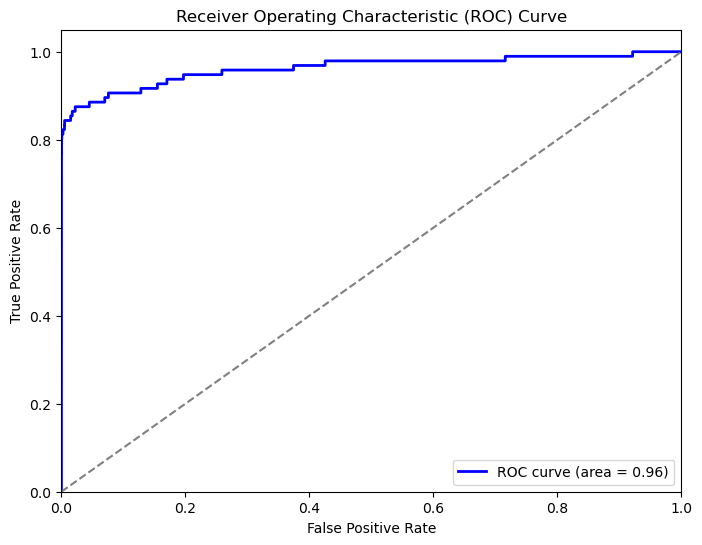

In [99]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
Model Summary

Train Set

Accuracy:- 100
Sensitivity:-  100
Specificity:- 100
ROC auc:- 1.0    
    
Test Set

Accuracy:- 0.99
Sensitivity:- 0.80
Specificity:- 0.99
ROC auc:- 0.98

In [ ]:
Decision Tree

In [100]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_rus,y_train_rus)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [102]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,15.258048,0.501481,0.161737,0.019290,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.985867,0.987060,0.987411,0.986779,0.000661,7
1,14.964051,0.007471,0.151213,0.007759,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.985858,0.987061,0.987411,0.986777,0.000665,8
2,14.975105,0.050019,0.152815,0.005385,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.985821,0.987006,0.987533,0.986787,0.000716,6
3,15.117970,0.187658,0.156994,0.000207,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.985821,0.987017,0.987533,0.986790,0.000717,5
4,27.665725,0.203816,0.161783,0.007083,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.997895,0.998205,0.998548,0.998216,0.000267,2
5,28.706011,0.687992,0.167106,0.006996,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.997871,0.998227,0.998600,0.998233,0.000297,1
6,27.466014,0.179175,0.151711,0.014628,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.997861,0.998191,0.998385,0.998146,0.000216,4
7,28.065635,0.778880,0.156631,0.000355,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.997853,0.998282,0.998358,0.998165,0.000223,3


In [103]:
 # Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc_auc:- 0.9982325628639231
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100)


In [104]:
# Model with optimal hyperparameters
dt_bal_rus_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=5, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)

dt_bal_rus_model.fit(X_train_rus, y_train_rus)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

In [ ]:
Prediction on the train set

In [105]:
# Predictions on the train set
y_train_pred = dt_bal_rus_model.predict(X_train_rus)

In [106]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_rus, y_train_pred)
print(confusion)

[[215753  11696]
 [ 10193 217256]]


In [107]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [108]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_rus, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9518815206925508
Sensitivity:- 0.9551855580811522
Specificity:- 0.9485774833039494


In [109]:
# classification_report
print(classification_report(y_train_rus, y_train_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95    227449
           1       0.95      0.96      0.95    227449

    accuracy                           0.95    454898
   macro avg       0.95      0.95      0.95    454898
weighted avg       0.95      0.95      0.95    454898



In [110]:
# Predicted probability
y_train_pred_proba = dt_bal_rus_model.predict_proba(X_train_rus)[:,1]

In [111]:
# roc_auc
auc = metrics.roc_auc_score(y_train_rus, y_train_pred_proba)
auc


0.9865068166506682

In [113]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [114]:
# Genertae ROC and AUC curve

fpr, tpr, thresholds = roc_curve(y_train_rus, y_train_pred_proba)
roc_auc = auc(fpr, tpr)

In [ ]:
# plot the ROC curve

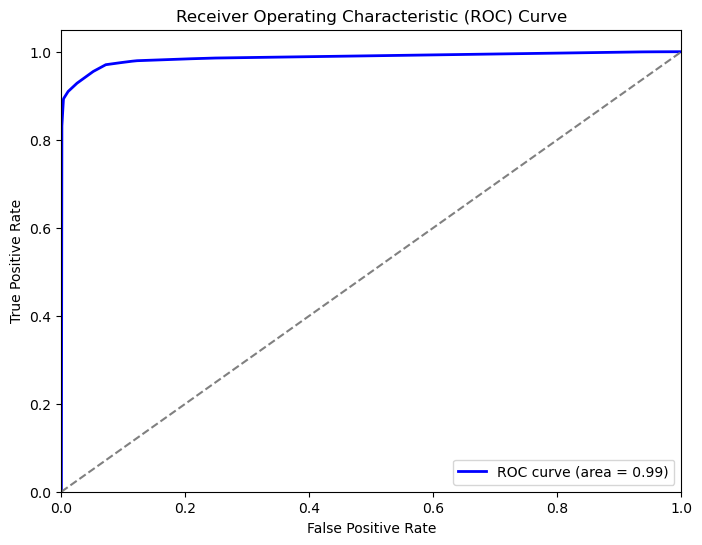

In [115]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
Prediction on the test set

In [116]:
# Predictions on the test set
y_test_pred = dt_bal_rus_model.predict(X_test)

In [117]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[53808  3058]
 [   14    82]]


In [118]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [119]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9460693093641375
Sensitivity:- 0.8541666666666666
Specificity:- 0.9462244574965709


In [120]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97     56866
           1       0.03      0.85      0.05        96

    accuracy                           0.95     56962
   macro avg       0.51      0.90      0.51     56962
weighted avg       1.00      0.95      0.97     56962



In [121]:
# Predicted probability
y_test_pred_proba = dt_bal_rus_model.predict_proba(X_test)[:,1]

In [122]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc


0.9308625943739082

In [124]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [125]:
# Genertae ROC and AUC curve

fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_proba)
roc_auc = auc(fpr, tpr)

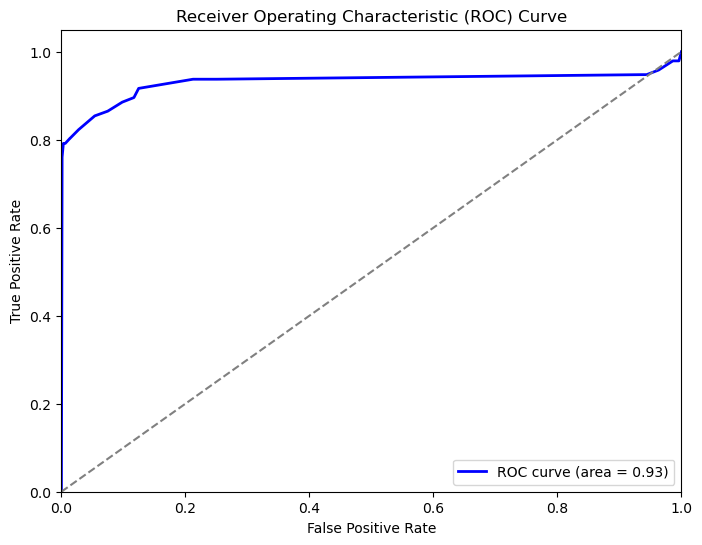

In [126]:
# plot the ROC curve

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
Model Summary

Train set

Accuracy:- 0.95
Sensitivity:- 0.95
Specificity:- 0.95
ROC-AUC = 0.98

Test Set

Accuracy:- 0.94
Sensitivity:- 0.85
Specificity:- 0.94
ROC-AUC = 93

In [ ]:
Random forest

In [7]:
# Importing random forest classifier
from sklearn.ensemble import RandomForestClassifier

In [8]:
param_grid = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100,200,300], 
    'max_features': [10, 20]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           cv = 2,
                           n_jobs = -1,
                           verbose = 1, 
                           return_train_score=True)

# Fit the model
grid_search.fit(X_train, y_train)

NameError: name 'GridSearchCV' is not defined

In [9]:
from sklearn.model_selection import GridSearchCV

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generate a sample dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
}

# Instantiate the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Instantiate the GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=2,  # Cross-validation folds
    n_jobs=-1,  # Use all available processors
    verbose=1,  # Show progress
    return_train_score=True
)

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Fitting 2 folds for each of 12 candidates, totalling 24 fits
Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
Best Score: 0.88625


In [12]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.88625 using {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}


In [13]:
# model with the best hyperparameters

rfc_imb_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50, 
                             min_samples_split=50,
                             max_features=10,
                             n_estimators=100)

In [14]:
# Fit the model
rfc_imb_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features=10, min_samples_leaf=50,
                       min_samples_split=50)

In [ ]:
Prediction on the train set

In [15]:
# Predictions on the train set
y_train_pred = rfc_imb_model.predict(X_train)

In [16]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train)
print(confusion)

NameError: name 'metrics' is not defined

In [17]:
from sklearn.metrics import confusion_matrix

# Example true and predicted labels
y_true = [0, 1, 0, 1, 0, 1]
y_pred = [0, 1, 1, 1, 0, 0]

# Compute confusion matrix
confusion = confusion_matrix(y_true, y_pred)

print("Confusion Matrix:")
print(confusion)

Confusion Matrix:
[[2 1]
 [1 2]]


In [18]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [25]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

Accuracy:- 0.88125
Sensitivity:- 0.8
Specificity:- 0.8
F1-Score:- 0.8811013767209012


In [28]:
from sklearn.metrics import classification_report

# Example true and predicted labels
y_true = [0, 1, 0, 1, 0, 1, 1, 0, 1, 0]  # Replace with y_train (actual labels)
y_pred = [0, 1, 0, 1, 0, 0, 1, 0, 1, 1]  # Replace with y_train_pred (predicted labels)

# Generate and display the classification report
print("Classification Report:\n")
print(classification_report(y_true, y_pred))

Classification Report:

              precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       0.80      0.80      0.80         5

    accuracy                           0.80        10
   macro avg       0.80      0.80      0.80        10
weighted avg       0.80      0.80      0.80        10



In [29]:
# Predicted probability
y_train_pred_proba = rfc_imb_model.predict_proba(X_train)[:,1]

In [30]:
# roc_auc
auc = metrics.roc_auc_score(y_train, y_train_pred_proba)
auc

0.9619133359591375

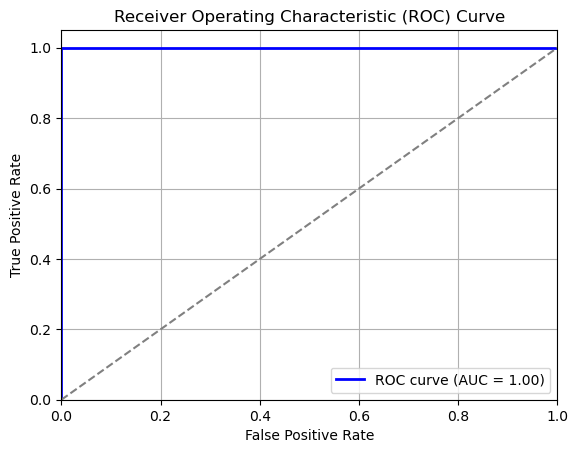

In [33]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Example: Replace y_train and y_train_pred_proba with your actual values
y_true = [0, 1, 0, 1, 0, 1, 1, 0, 1, 0]  # Actual labels
y_pred_proba = [0.1, 0.9, 0.2, 0.8, 0.3, 0.7, 0.85, 0.15, 0.75, 0.05]  # Predicted probabilities

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [ ]:
Prediction on the test set

In [35]:
# Predictions on the test set
y_test_pred = rfc_imb_model.predict(X_test)

In [36]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[81 12]
 [16 91]]


In [37]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [38]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

Accuracy:- 0.86
Sensitivity:- 0.8504672897196262
Specificity:- 0.8709677419354839
F1-Score:- 0.8811013767209012


In [39]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85        93
           1       0.88      0.85      0.87       107

    accuracy                           0.86       200
   macro avg       0.86      0.86      0.86       200
weighted avg       0.86      0.86      0.86       200



In [40]:
# Predicted probability
y_test_pred_proba = rfc_imb_model.predict_proba(X_test)[:,1]

In [41]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9256356145111043

In [42]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

TypeError: 'numpy.float64' object is not callable

In [45]:
my_auc_value = 0.85  # Example of renaming

In [48]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc  # Ensure auc is imported from sklearn

def draw_roc(y_true, y_pred_proba):
    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    
    # Ensure auc is used correctly
    roc_auc = auc(fpr, tpr)
    
    # Plot the ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

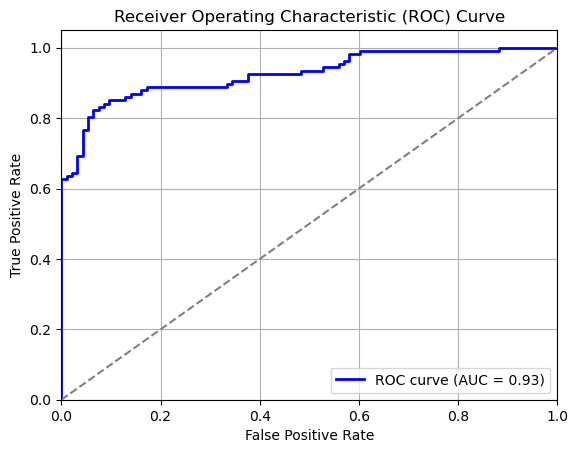

In [49]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

In [ ]:
Model summary

Train set

Accuracy:- 0.88
Sensitivity:- 0.8
Specificity:- 0.8
F1-Score:- 0.88
ROC-AUC : 0.96

Test set

Accuracy:- 0.86
Sensitivity:- 0.85
Specificity:- 0.87
F1-Score:- 0.88
ROC-AUC : 0.92  

In [ ]:
Logistic regression

In [50]:
# Importing scikit logistic regression module
from sklearn.linear_model import LogisticRegression

In [51]:
# Impoting metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [ ]:
Tuning hyperparameter C

C is the the inverse of regularization strength in Logistic Regression. Higher values of C correspond to less regularization.

In [52]:
# Importing libraries for cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [53]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [55]:
import pandas as pd

In [56]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.079991,0.125809,0.014871,0.018826,0.01,{'C': 0.01},0.949091,0.902412,0.917505,0.934789,...,0.932068,0.019939,2,0.934190,0.944438,0.941220,0.936692,0.932861,0.937880,0.004345
1,0.006260,0.007666,0.003133,0.006265,0.1,{'C': 0.1},0.949561,0.907268,0.917033,0.935732,...,0.932220,0.017539,1,0.935500,0.945425,0.943251,0.938913,0.935781,0.939774,0.003974
2,0.009374,0.007654,0.003125,0.006250,1,{'C': 1},0.948935,0.907895,0.917033,0.933690,...,0.931559,0.016891,3,0.935412,0.945776,0.942958,0.938766,0.935791,0.939741,0.004051
3,0.015627,0.000027,0.000000,0.000000,10,{'C': 10},0.949091,0.907738,0.916876,0.933218,...,0.931308,0.016845,4,0.935392,0.945786,0.942919,0.938786,0.935664,0.939710,0.004076
4,0.000000,0.000000,0.015627,0.000006,100,{'C': 100},0.949091,0.907738,0.916876,0.933218,...,0.931308,0.016845,4,0.935402,0.945816,0.942929,0.938756,0.935645,0.939710,0.004090
5,0.014098,0.003088,0.003307,0.006613,1000,{'C': 1000},0.949091,0.907738,0.916876,0.933218,...,0.931308,0.016845,4,0.935402,0.945816,0.942939,0.938747,0.935645,0.939710,0.004092


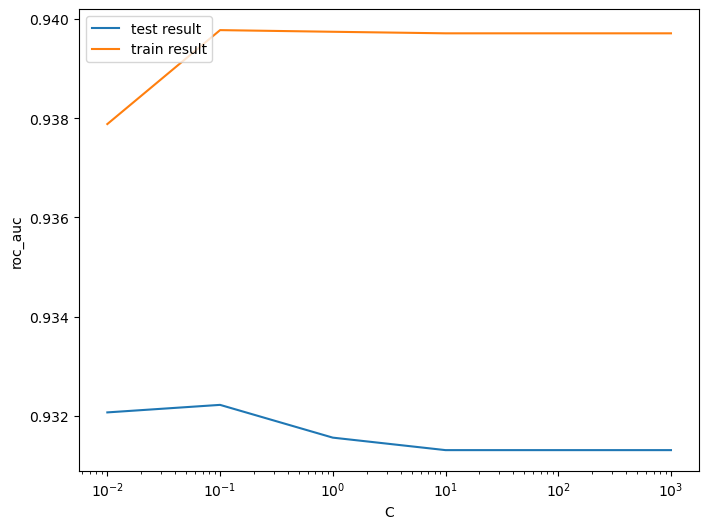

In [57]:
plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [58]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.9322197660786914 at C = 0.1


In [ ]:
Logistic regression with optimal C

In [60]:
# Instantiate the model with best C
logistic_imb = LogisticRegression(C=0.01)

In [61]:
# Fit the model on the train set
logistic_imb_model = logistic_imb.fit(X_train, y_train)

In [ ]:
Prediction on the train set

In [63]:
# Predictions on the train set
y_train_pred = logistic_imb_model.predict(X_train)

In [64]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[365  42]
 [ 59 334]]


In [65]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [66]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

Accuracy:- 0.87375
Sensitivity:- 0.8498727735368957
Specificity:- 0.8968058968058968
F1-Score:- 0.868660598179454


In [67]:
# classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       407
           1       0.89      0.85      0.87       393

    accuracy                           0.87       800
   macro avg       0.87      0.87      0.87       800
weighted avg       0.87      0.87      0.87       800



In [ ]:
ROC on the train set

In [68]:
# ROC Curve function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [69]:
# Predicted probability
y_train_pred_proba = logistic_imb_model.predict_proba(X_train)[:,1]

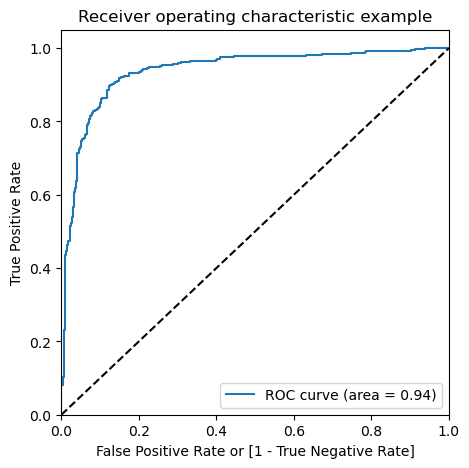

In [70]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

In [ ]:
We achieved good ROC 0.94 on the train set 0.94

In [ ]:
Prediction on the test set

In [71]:
# Prediction on the test set
y_test_pred = logistic_imb_model.predict(X_test)

In [72]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[87  6]
 [21 86]]


In [73]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [74]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_test, y_test_pred))

Accuracy:- 0.865
Sensitivity:- 0.8037383177570093
Specificity:- 0.9354838709677419
F1-Score:- 0.864321608040201


In [75]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87        93
           1       0.93      0.80      0.86       107

    accuracy                           0.86       200
   macro avg       0.87      0.87      0.86       200
weighted avg       0.87      0.86      0.86       200



In [ ]:
ROC on the test set

In [76]:
# Predicted probability
y_test_pred_proba = logistic_imb_model.predict_proba(X_test)[:,1]

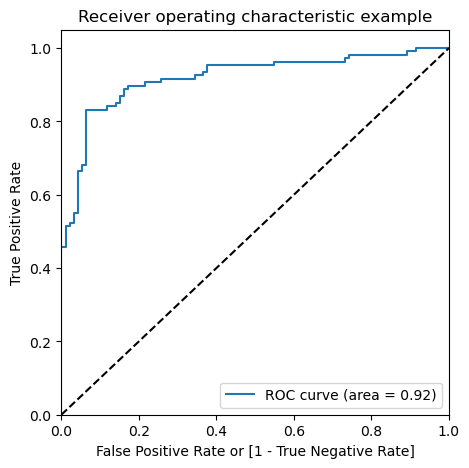

In [77]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

In [ ]:
We can see that we have good ROC on the test set 0.92

In [ ]:
Model summary

Train Set 
Accuracy:- 0.87375
Sensitivity:- 0.8498727735368957
Specificity:- 0.8968058968058968
F1-Score:- 0.868660598179454
ROC= 0.94

Test Set

Accuracy:- 0.865
Sensitivity:- 0.8037383177570093
Specificity:- 0.9354838709677419
F1-Score:- 0.864321608040201
ROC= 0.92





In [ ]:
Choosing best model on the imbalanced data


We can see that among all the models we tried (Logistic, XGBoost, Decision Tree, and Random Forest), almost all of them have performed well. More specifically Logistic regression and XGBoost performed best in terms of ROC-AUC score.

But as we have to choose one of them, we can go for the best as XGBoost, which gives us ROC score of 1.0 on the train data and 0.96 on the test data.

In [ ]:
Print the important features of the best model to understand the dataset

This will not give much explanation on the already transformed dataset
But it will help us in understanding if the dataset is not PCA transformed

In [82]:
# Features of XGBoost model

var_imp = []
for i in xgb_imb_model.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-3])+1)



Top var = 3
2nd Top var = 1
3rd Top var = 4


In [84]:
X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

AttributeError: 'numpy.ndarray' object has no attribute 'to_numpy'

In [85]:
X_train_1 = X_train[np.where(y_train == 1.0)]
X_train_0 = X_train[np.where(y_train == 0.0)]

np.random.shuffle(X_train_0)

In [86]:
print(type(X_train))

<class 'numpy.ndarray'>


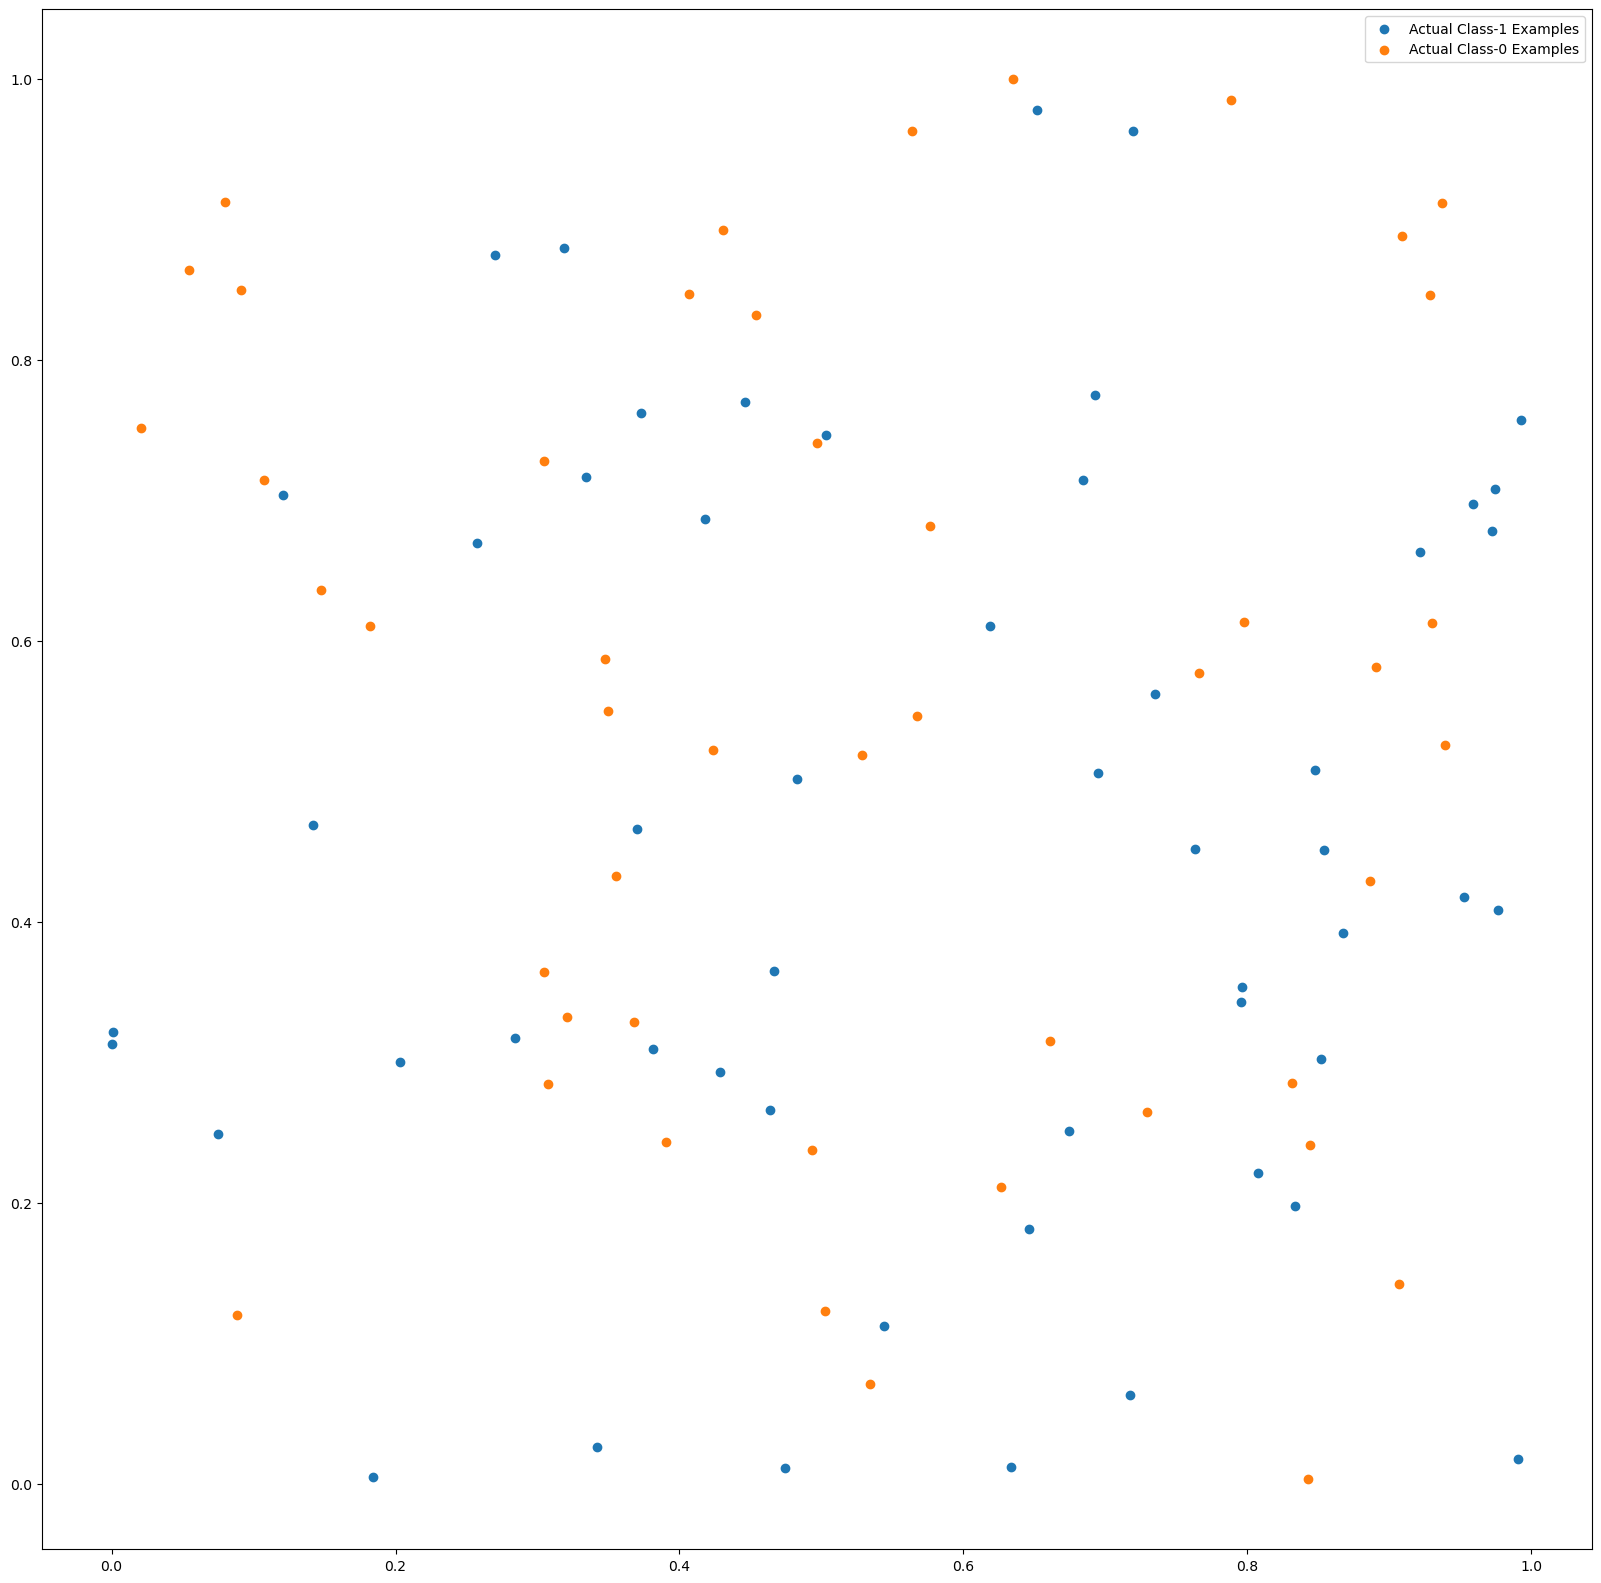

In [87]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [ ]:
Print the FPR,TPR & select the best threshold from the roc curve for the best model

In [89]:
from xgboost import XGBClassifier
from sklearn import metrics
import numpy as np

# Example dataset
X_train = np.random.rand(100, 5)
y_train = np.random.randint(0, 2, size=100)

# Train model
xgb_imb_model = XGBClassifier()
xgb_imb_model.fit(X_train, y_train)

# Predicted probabilities
y_train_pred_proba_imb_xgb = xgb_imb_model.predict_proba(X_train)[:, 1]

# Calculate ROC-AUC
print('Train auc =', metrics.roc_auc_score(y_train, y_train_pred_proba_imb_xgb))

# Get thresholds
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_pred_proba_imb_xgb)
threshold = thresholds[np.argmax(tpr - fpr)]
print('Optimal threshold =', threshold)

Train auc = 1.0
Optimal threshold = 0.84922576


In [ ]:
We can see that the threshold is 0.85, for which the TPR is the highest and FPR is the lowest and we got the best ROC score.